In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')
from ultralytics import YOLO
from glob import glob
from sklearn.metrics import jaccard_score, accuracy_score
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os

Mounted at /content/drive
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Load trained model
model = YOLO('/content/drive/MyDrive/Mouth_Detection_YOLOv8/Mouth_Detection/weights/best.pt')

# Path to test images
test_dir = '/content/drive/MyDrive/Mouth Detection Dataset/images/test'
image_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))]


0: 640x640 1 ips, 9.3ms
Speed: 4.1ms preprocess, 9.3ms inference, 367.6ms postprocess per image at shape (1, 3, 640, 640)


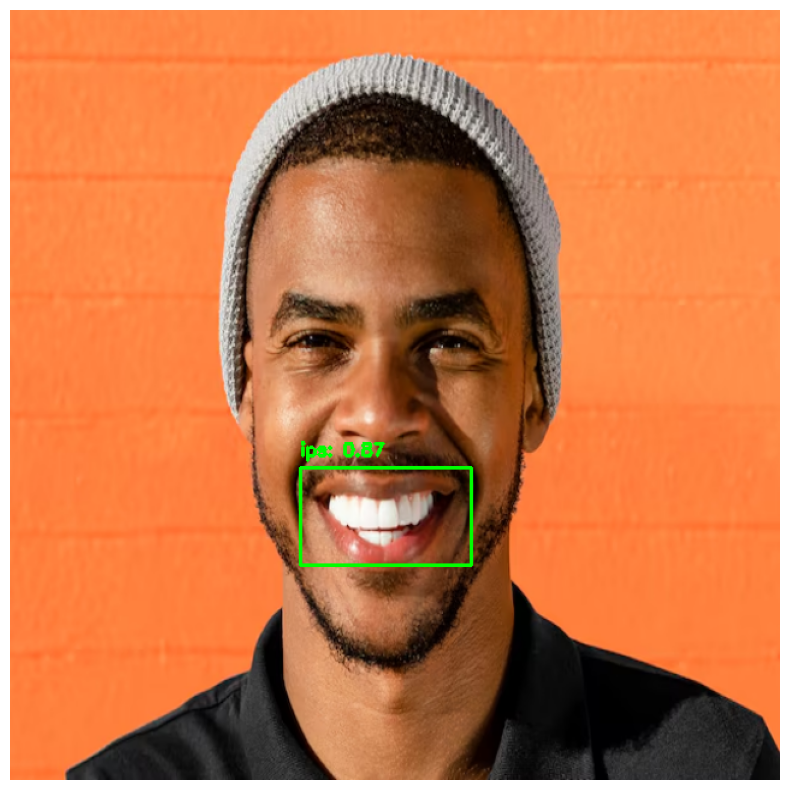

In [6]:
def show_predictions(image_path, model, input_size=640):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image to 640x640
    img_resized = cv2.resize(img, (input_size, input_size))

    # Run prediction on resized image
    results = model(img_resized)[0]

    # Draw boxes
    for box, score, cls in zip(results.boxes.xyxy, results.boxes.conf, results.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        label = f"{model.names[int(cls)]}: {score:.2f}"
        cv2.rectangle(img_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_resized, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    # Show image
    plt.figure(figsize=(10,10))
    plt.imshow(img_resized)
    plt.axis('off')
    plt.show()

# Example usage
image_path = "your_image.jpg"  # replace with your image path
show_predictions(image_path, model)